<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

# Задача 1. 
Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
def sum_prod(X, V):
    if not X:
        return np.zeros((0, 1))
    
    n = X[0].shape[0]
    
    total = np.zeros((n, 1))
    
    for i, (M, v) in enumerate(zip(X, V)):
        if M.shape != (n, n):
            raise ValueError(f"Матрица под индексом {i} имеет неправильную размерность {M.shape}, ожидается ({n}, {n}).")
        if v.shape not in [(n,), (n, 1)]:
            raise ValueError(f"Вектор под индексом {i} имеет неправильную размерность {v.shape}, ожидается ({n},) или ({n}, 1).")
        
        v = v.reshape(n, 1) 
        product = M @ v
        total += product
    
    return total


In [5]:
class TestSumProd(unittest.TestCase):
    
    def test_standard_case(self):
        M1 = np.array([[1, 2], [3, 4]])
        M2 = np.array([[5, 6], [7, 8]])
        X = [M1, M2]
        
        V1 = np.array([1, 0])
        V2 = np.array([0, 1])
        V = [V1, V2]
        
        expected = np.array([[7], [11]])
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_single_matrix_vector(self):
        M = np.array([[2, 0], [0, 2]])
        V = [np.array([3, 4])]
        X = [M]
        
        expected = np.array([[6], [8]])
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_empty_lists(self):
        X = []
        V = []
        expected = np.zeros((0, 1))
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_mismatched_matrix_vector_shapes(self):
        M = np.array([[1, 2], [3, 4]])
        V = [np.array([1, 2, 3])]  
        X = [M]
        
        with self.assertRaises(ValueError) as context:
            sum_prod(X, V)
        self.assertIn("Вектор под индексом 0 имеет неправильную размерность", str(context.exception))
    
    def test_incorrect_matrix_size(self):
        M1 = np.array([[1, 2, 3], [4, 5, 6]])  
        M2 = np.array([[7, 8, 9], [10, 11, 12]])
        V1 = np.array([1, 2])
        V2 = np.array([3, 4])
        X = [M1, M2]
        V = [V1, V2]
        
        with self.assertRaises(ValueError) as context:
            sum_prod(X, V)
        self.assertIn("Матрица под индексом 0 имеет неправильную размерность", str(context.exception))
    
    def test_vector_as_column(self):
        M1 = np.array([[1, 0], [0, 1]])
        M2 = np.array([[0, 1], [1, 0]])
        X = [M1, M2]
        
        V1 = np.array([[2], [3]])  
        V2 = np.array([[4], [5]])
        V = [V1, V2]
        
        expected = np.array([[7], [7]])
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_large_p(self):
        p = 100
        n = 50
        X = [np.identity(n) for _ in range(p)]
        V = [np.ones(n) for _ in range(p)]
        
        expected = np.ones((n, 1)) * p
        
        result = sum_prod(X, V)
        np.testing.assert_array_equal(result, expected)
    
    def test_mismatched_lengths(self):
        M1 = np.array([[1, 2], [3, 4]])
        V1 = np.array([1, 2])
        M2 = np.array([[5, 6], [7, 8]])
        V2 = np.array([3, 4])
        X = [M1, M2]
        V = [V1]
        
        pass


# Задача 2. 
Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [7]:
import numpy as np

def binarize(M, threshold=0.5):
    
    if not isinstance(M, np.ndarray):
        raise ValueError("Матрица M должна быть NumPy массивом.")
    if M.ndim != 2:
        raise ValueError("Матрица M должна быть двумерным массивом.")
    if not isinstance(threshold, (int, float)):
        raise ValueError("Пороговое значение threshold должно быть числом.")
    
    binary_M = (M > threshold).astype(int)
    return binary_M


In [8]:
class TestBinarizeMatrix(unittest.TestCase):
    
    def test_standard_case(self):
        M = np.array([
            [0.5, 1.2, 3.3],
            [4.4, 2.2, 0.1],
            [5.5, 6.6, 7.7]
        ])
        threshold = 2.0
        expected = np.array([
            [0, 0, 1],
            [1, 1, 0],
            [1, 1, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_all_above_threshold(self):
        M = np.array([
            [3, 4],
            [5, 6]
        ])
        threshold = 2
        expected = np.ones((2, 2), dtype=int)
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_all_below_threshold(self):
        M = np.array([
            [0, 1],
            [1.5, 1.9]
        ])
        threshold = 2
        expected = np.zeros((2, 2), dtype=int)
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_elements_equal_threshold(self):
        M = np.array([
            [2, 3],
            [2, 1]
        ])
        threshold = 2
        expected = np.array([
            [0, 1],
            [0, 0]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_empty_matrix(self):
        M = np.array([[]])
        threshold = 1
        expected = np.array([[]], dtype=int)
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_negative_values(self):
        M = np.array([
            [-3, -1],
            [0, 2]
        ])
        threshold = -2
        expected = np.array([
            [0, 1],
            [1, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_integer_threshold(self):
        M = np.array([
            [1, 2, 3],
            [4, 5, 6]
        ])
        threshold = 3
        expected = np.array([
            [0, 0, 0],
            [1, 1, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_non_numeric_threshold(self):
        M = np.array([
            [1, 2],
            [3, 4]
        ])
        threshold = "a"
        with self.assertRaises(ValueError) as context:
            binarize(M, threshold)
        self.assertIn("Пороговое значение threshold должно быть числом", str(context.exception))
    
    def test_non_numpy_input(self):
        M = [
            [1, 2],
            [3, 4]
        ]  
        threshold = 2
        with self.assertRaises(ValueError) as context:
            binarize(M, threshold)
        self.assertIn("Матрица M должна быть NumPy массивом", str(context.exception))
    
    def test_non_2d_matrix(self):
        M = np.array([1, 2, 3, 4]) 
        threshold = 2
        with self.assertRaises(ValueError) as context:
            binarize(M, threshold)
        self.assertIn("Матрица M должна быть двумерным массивом", str(context.exception))
    
    def test_mixed_data_types(self):
        M = np.array([
            [1, 2.5],
            [3.3, 4]
        ])
        threshold = 2.5
        expected = np.array([
            [0, 0],
            [1, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_large_matrix(self):
        M = np.random.rand(1000, 1000)
        threshold = 0.5
        expected = (M > threshold).astype(int)
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_threshold_zero(self):
        M = np.array([
            [-1, 0, 1],
            [2, -2, 3]
        ])
        threshold = 0
        expected = np.array([
            [0, 0, 1],
            [1, 0, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_threshold_float(self):
        M = np.array([
            [1.1, 2.2, 3.3],
            [4.4, 5.5, 6.6]
        ])
        threshold = 3.3
        expected = np.array([
            [0, 0, 0],
            [1, 1, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_matrix_with_nan(self):
        M = np.array([
            [1, np.nan],
            [3, 4]
        ])
        threshold = 2
        expected = np.array([
            [0, 0],
            [1, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)
    
    def test_matrix_with_inf(self):
        M = np.array([
            [1, np.inf],
            [-np.inf, 4]
        ])
        threshold = 0
        expected = np.array([
            [1, 1],  
            [0, 1]
        ])
        result = binarize(M, threshold)
        np.testing.assert_array_equal(result, expected)



# Задача 3. 
Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [10]:
def unique_rows(mat):
    mat_np = np.array(mat)
    unique_elements_per_row = []

    for row in mat_np:
        unique_elements, counts = np.unique(row, return_counts=True)
        unique = unique_elements[counts == 1]
        unique_elements_per_row.append(unique)

    return unique_elements_per_row

def unique_columns(mat):
    mat_np = np.array(mat)
    if mat_np.size == 0:
        return []

    unique_elements_per_column = []

    for col in mat_np.T:
        unique_elements, counts = np.unique(col, return_counts=True)
        unique = unique_elements[counts == 1]
        unique_elements_per_column.append(unique)

    return unique_elements_per_column


In [11]:
class TestUniqueElements(unittest.TestCase):

    def test_unique_rows_standard(self):
        mat = [
            [1, 2, 2, 3],
            [4, 4, 5, 6],
            [7, 8, 8, 8]
        ]
        expected = [
            np.array([1, 3]),
            np.array([5, 6]),
            np.array([7])
        ]
        result = unique_rows(mat)
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_unique_rows_all_duplicates(self):
        mat = [
            [1, 1, 1],
            [2, 3, 2],
            [4, 5, 6]
        ]
        expected = [
            np.array([]),
            np.array([3]),
            np.array([4, 5, 6])
        ]
        result = unique_rows(mat)
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_unique_rows_empty_matrix(self):
        mat = []
        expected = []
        result = unique_rows(mat)
        self.assertEqual(result, expected)

    def test_unique_rows_empty_row(self):
        mat = [
            []
        ]
        expected = [
            np.array([])
        ]
        result = unique_rows(mat)
        self.assertEqual(len(result), len(expected))
        if expected[0].size == 0:
            self.assertTrue(len(result[0]) == 0)

    def test_unique_columns_standard(self):
        mat = [
            [1, 2, 2, 3],
            [1, 4, 5, 6],
            [7, 8, 2, 8]
        ]
        expected = [
            np.array([7]),
            np.array([2, 4, 8]),
            np.array([5]),
            np.array([3, 6, 8])    
        ]
        result = unique_columns(mat)
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_unique_columns_all_duplicates(self):
        mat = [
            [1, 1, 1],
            [2, 3, 2],
            [4, 5, 6]
        ]
        expected = [
            np.array([1, 2, 4]),
            np.array([1, 3, 5]),
            np.array([1, 2, 6])
        ]
        result = unique_columns(mat)
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_unique_columns_empty_matrix(self):
        mat = []
        expected = []
        result = unique_columns(mat)
        self.assertEqual(result, expected)

    def test_unique_columns_empty_column(self):
        mat = [
            []
        ]
        expected = []
        result = unique_columns(mat)
        self.assertEqual(result, expected)

# Задача 4. 
Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [13]:
def generate_normal_matrix(m, n, mean=0, std=1, threshold=None, random_seed=None):
    
    if random_seed is not None:
        np.random.seed(random_seed)
    
    M = np.random.normal(loc=mean, scale=std, size=(m, n))
    
    if threshold is not None:
        M = (M > threshold).astype(int)
    
    row_means = M.mean(axis=1)
    row_variances = M.var(axis=1)
    
    col_means = M.mean(axis=0)
    col_variances = M.var(axis=0)
    
    for i in range(m):
        plt.figure(figsize=(6, 4))
        plt.hist(M[i, :], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма значений строки {i+1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
    
    for j in range(n):
        plt.figure(figsize=(6, 4))
        plt.hist(M[:, j], bins=10, color='salmon', edgecolor='black')
        plt.title(f'Гистограмма значений столбца {j+1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
    
    return M, row_means, row_variances, col_means, col_variances


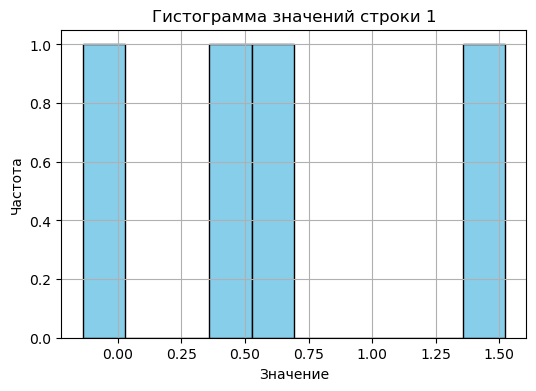

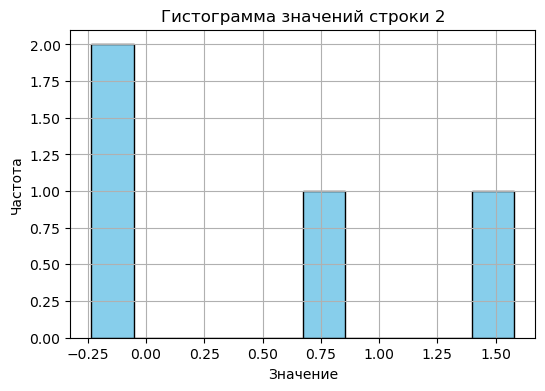

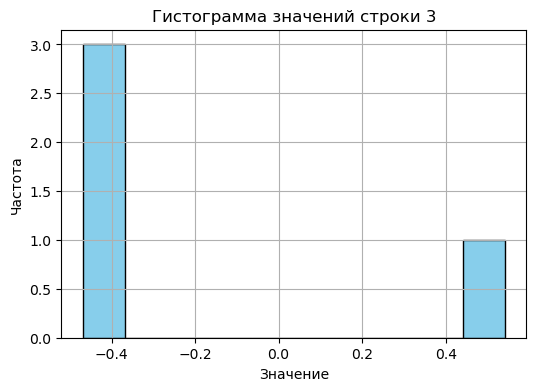

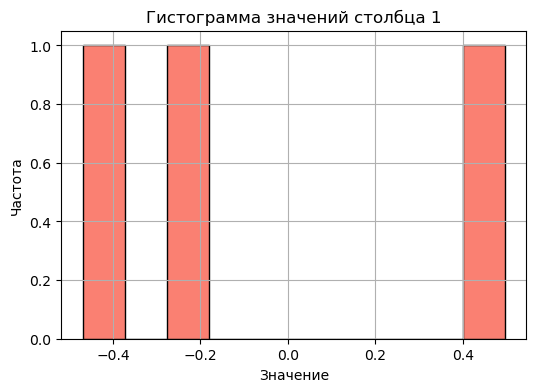

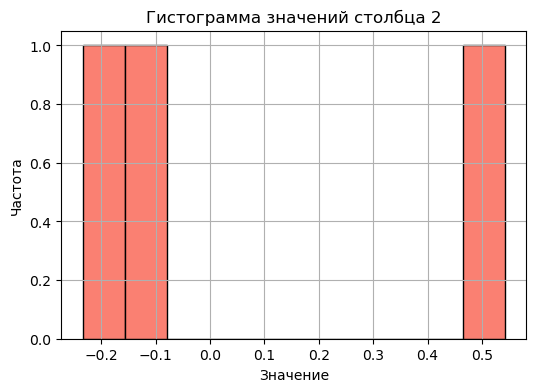

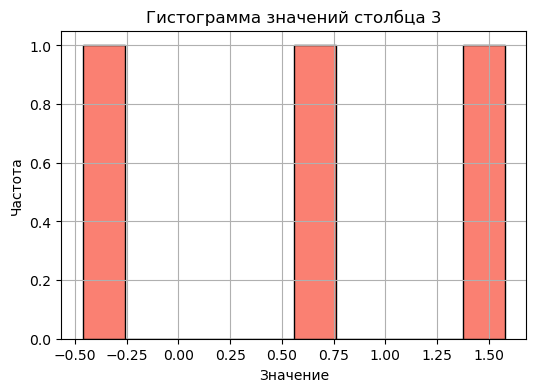

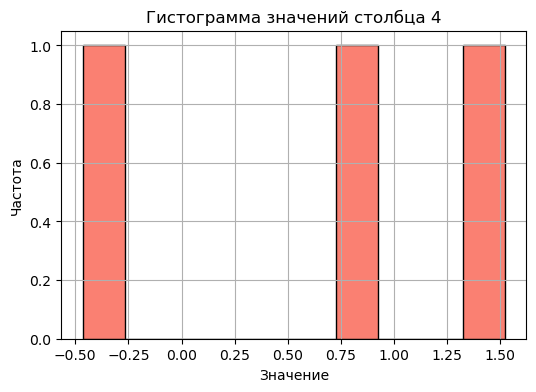

Сгенерированная матрица:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]

Средние значения по строкам: [ 0.63229206  0.4695893  -0.21401545]
Дисперсии по строкам: [0.35144734 0.57761516 0.19080683]

Средние значения по столбцам: [-0.0689712   0.0567196   0.58782789  0.60824494]
Дисперсии по столбцам: [0.16922929 0.1195524  0.69718155 0.67186482]


In [14]:
M, row_means, row_variances, col_means, col_variances = generate_normal_matrix(3, 4, random_seed=42)

print("Сгенерированная матрица:\n", M)
print("\nСредние значения по строкам:", row_means)
print("Дисперсии по строкам:", row_variances)
print("\nСредние значения по столбцам:", col_means)
print("Дисперсии по столбцам:", col_variances)


# Задача 5. 
Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [16]:
def chess(m, n, a, b):
    if not (isinstance(m, int) and m > 0):
        raise ValueError("Параметр m должен быть положительным целым числом.")
    if not (isinstance(n, int) and n > 0):
        raise ValueError("Параметр n должен быть положительным целым числом.")
    
    chessboard = np.empty((m, n), dtype=object)
    
    for i in range(m):
        for j in range(n):
            chessboard[i, j] = a if (i + j) % 2 == 0 else b
    
    return chessboard

In [17]:
class TestChess(unittest.TestCase):
    
    def test_standard_case_even_dimensions(self):
        m, n = 4, 4
        a, b = 1, 0
        expected = np.array([
            [1, 0, 1, 0],
            [0, 1, 0, 1],
            [1, 0, 1, 0],
            [0, 1, 0, 1]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_standard_case_odd_dimensions(self):
        m, n = 3, 5
        a, b = 'X', 'O'
        expected = np.array([
            ['X', 'O', 'X', 'O', 'X'],
            ['O', 'X', 'O', 'X', 'O'],
            ['X', 'O', 'X', 'O', 'X']
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_single_row(self):
        m, n = 1, 5
        a, b = True, False
        expected = np.array([[True, False, True, False, True]])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_single_column(self):
        m, n = 5, 1
        a, b = -1, 1
        expected = np.array([
            [-1],
            [1],
            [-1],
            [1],
            [-1]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_large_matrix(self):
        m, n = 100, 100
        a, b = 5, -5
        result = chess(m, n, a, b)
        self.assertEqual(result.shape, (m, n))
        expected_sample = np.array([
            [5, -5, 5, -5],
            [-5, 5, -5, 5],
            [5, -5, 5, -5],
            [-5, 5, -5, 5]
        ])
        np.testing.assert_array_equal(result[:4, :4], expected_sample)
    
    def test_invalid_m_negative(self):
        with self.assertRaises(ValueError) as context:
            chess(-3, 4, 1, 0)
        self.assertIn("Параметр m должен быть положительным целым числом", str(context.exception))
    
    def test_invalid_n_zero(self):
        with self.assertRaises(ValueError) as context:
            chess(3, 0, 1, 0)
        self.assertIn("Параметр n должен быть положительным целым числом", str(context.exception))
    
    def test_invalid_m_type(self):
        with self.assertRaises(ValueError) as context:
            chess(3.5, 4, 1, 0)
        self.assertIn("Параметр m должен быть положительным целым числом", str(context.exception))
    
    def test_invalid_n_type(self):
        with self.assertRaises(ValueError) as context:
            chess(3, '4', 1, 0)
        self.assertIn("Параметр n должен быть положительным целым числом", str(context.exception))
    
    def test_non_numeric_a_b(self):
        m, n = 2, 2
        a, b = [1, 2], {3: 'three'}
        expected = np.array([
            [[1, 2], {3: 'three'}],
            [{3: 'three'}, [1, 2]]
        ], dtype=object)
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_zero_dimensions(self):
        with self.assertRaises(ValueError) as context:
            chess(0, 5, 1, 0)
        self.assertIn("Параметр m должен быть положительным целым числом", str(context.exception))
    
    def test_m_equals_one_n_equals_one(self):
        m, n = 1, 1
        a, b = 'A', 'B'
        expected = np.array([['A']])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_non_square_matrix(self):
        m, n = 2, 3
        a, b = 10, -10
        expected = np.array([
            [10, -10, 10],
            [-10, 10, -10]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_different_data_types(self):
        m, n = 3, 3
        a, b = 1.5, 2
        expected = np.array([
            [1.5, 2, 1.5],
            [2, 1.5, 2],
            [1.5, 2, 1.5]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_zero_and_negative_numbers(self):
        m, n = 3, 3
        a, b = 0, -1
        expected = np.array([
            [0, -1, 0],
            [-1, 0, -1],
            [0, -1, 0]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_boolean_values(self):
        m, n = 2, 2
        a, b = True, False
        expected = np.array([
            [True, False],
            [False, True]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_strings_as_a_b(self):
        m, n = 3, 3
        a, b = 'X', 'O'
        expected = np.array([
            ['X', 'O', 'X'],
            ['O', 'X', 'O'],
            ['X', 'O', 'X']
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_large_a_b_values(self):
        m, n = 2, 2
        a, b = 1e10, -1e10
        expected = np.array([
            [1e10, -1e10],
            [-1e10, 1e10]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_float_dimensions(self):
        with self.assertRaises(ValueError) as context:
            chess(3.0, 4, 1, 0)
        self.assertIn("Параметр m должен быть положительным целым числом", str(context.exception))
        
        with self.assertRaises(ValueError) as context:
            chess(3, 4.0, 1, 0)
        self.assertIn("Параметр n должен быть положительным целым числом", str(context.exception))
    
    def test_negative_a_positive_b(self):
        m, n = 2, 2
        a, b = -5, 5
        expected = np.array([
            [-5, 5],
            [5, -5]
        ])
        result = chess(m, n, a, b)
        np.testing.assert_array_equal(result, expected)
    
    def test_large_m_n(self):
        m, n = 50, 50
        a, b = 1, 0
        result = chess(m, n, a, b)
        self.assertEqual(result.shape, (m, n))
        expected_sample = np.array([
            [1, 0, 1, 0, 1],
            [0, 1, 0, 1, 0],
            [1, 0, 1, 0, 1],
            [0, 1, 0, 1, 0],
            [1, 0, 1, 0, 1]
        ])
        np.testing.assert_array_equal(result[:5, :5], expected_sample)


# Задача 6. 
Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [19]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    
    if not (isinstance(a, int) and a > 0):
        raise ValueError("Параметр a (ширина прямоугольника) должен быть положительным целым числом.")
    if not (isinstance(b, int) and b > 0):
        raise ValueError("Параметр b (высота прямоугольника) должен быть положительным целым числом.")
    if not (isinstance(m, int) and m > 0):
        raise ValueError("Параметр m (высота изображения) должен быть положительным целым числом.")
    if not (isinstance(n, int) and n > 0):
        raise ValueError("Параметр n (ширина изображения) должен быть положительным целым числом.")
    if a > n or b > m:
        raise ValueError("Размеры прямоугольника не могут превышать размеры изображения.")
    if not (isinstance(rectangle_color, (tuple, list)) and len(rectangle_color) == 3 and 
            all(isinstance(c, int) and 0 <= c <= 255 for c in rectangle_color)):
        raise ValueError("rectangle_color должен быть кортежем или списком из трёх целых чисел от 0 до 255 (RGB).")
    if not (isinstance(background_color, (tuple, list)) and len(background_color) == 3 and 
            all(isinstance(c, int) and 0 <= c <= 255 for c in background_color)):
        raise ValueError("background_color должен быть кортежем или списком из трёх целых чисел от 0 до 255 (RGB).")
    
    image = np.tile(background_color, (m, n, 1))
    
    top = (m - b) // 2
    left = (n - a) // 2
    bottom = top + b
    right = left + a
    
    image[top:bottom, left:right] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    
    if not (isinstance(a, int) and a > 0):
        raise ValueError("Параметр a (полуось X овала) должен быть положительным целым числом.")
    if not (isinstance(b, int) and b > 0):
        raise ValueError("Параметр b (полуось Y овала) должен быть положительным целым числом.")
    if not (isinstance(m, int) and m > 0):
        raise ValueError("Параметр m (высота изображения) должен быть положительным целым числом.")
    if not (isinstance(n, int) and n > 0):
        raise ValueError("Параметр n (ширина изображения) должен быть положительным целым числом.")
    if 2 * a > n or 2 * b > m:
        raise ValueError("Размеры овала не могут превышать размеры изображения.")
    if not (isinstance(ellipse_color, (tuple, list)) and len(ellipse_color) == 3 and 
            all(isinstance(c, int) and 0 <= c <= 255 for c in ellipse_color)):
        raise ValueError("ellipse_color должен быть кортежем или списком из трёх целых чисел от 0 до 255 (RGB).")
    if not (isinstance(background_color, (tuple, list)) and len(background_color) == 3 and 
            all(isinstance(c, int) and 0 <= c <= 255 for c in background_color)):
        raise ValueError("background_color должен быть кортежем или списком из трёх целых чисел от 0 до 255 (RGB).")
    
    image = np.tile(background_color, (m, n, 1))
    
    y0, x0 = m / 2, n / 2
    
    Y, X = np.ogrid[:m, :n]
    
    distance = ((X - x0) ** 2) / (a ** 2) + ((Y - y0) ** 2) / (b ** 2)
    
    mask = distance <= 1
    
    image[mask] = ellipse_color
    
    return image

In [20]:
class TestDrawShapes(unittest.TestCase):
    
    def test_draw_rectangle_standard(self):
        m, n = 200, 200
        a, b = 100, 50
        rect_color = (255, 0, 0)      
        bg_color = (255, 255, 255)    
        img = draw_rectangle(a, b, m, n, rect_color, bg_color)
        
        self.assertEqual(img.shape, (m, n, 3))
        
        top = (m - b) // 2
        left = (n - a) // 2
        bottom = top + b
        right = left + a
        
        self.assertTrue(np.all(img[top:bottom, left:right] == rect_color))
        
        self.assertTrue(np.all(img[0, 0] == bg_color))
        self.assertTrue(np.all(img[m-1, 0] == bg_color))
        self.assertTrue(np.all(img[0, n-1] == bg_color))
        self.assertTrue(np.all(img[m-1, n-1] == bg_color))
        
        self.assertTrue(np.all(img[top-1, left-1] == bg_color))
        self.assertTrue(np.all(img[bottom, right] == bg_color))
    
    def test_draw_ellipse_standard(self):
        m, n = 200, 200
        a, b = 80, 40
        ellipse_color = (0, 255, 0)   
        bg_color = (255, 255, 255)    
        img = draw_ellipse(a, b, m, n, ellipse_color, bg_color)
        
        self.assertEqual(img.shape, (m, n, 3))
        
        y0, x0 = m / 2, n / 2
        
        Y, X = np.ogrid[:m, :n]
        
        distance = ((X - x0) ** 2) / (a ** 2) + ((Y - y0) ** 2) / (b ** 2)
        
        mask = distance <= 1
        
        self.assertTrue(np.all(img[mask] == ellipse_color))
        
        self.assertTrue(np.all(img[~mask] == bg_color))
        
        self.assertTrue(np.all(img[0, 0] == bg_color))
        self.assertTrue(np.all(img[m-1, 0] == bg_color))
        self.assertTrue(np.all(img[0, n-1] == bg_color))
        self.assertTrue(np.all(img[m-1, n-1] == bg_color))
    
    def test_draw_rectangle_invalid_size(self):
        with self.assertRaises(ValueError):
            draw_rectangle(a=300, b=50, m=200, n=200, rectangle_color=(0,0,0), background_color=(255,255,255))
    
    def test_draw_ellipse_invalid_size(self):
        with self.assertRaises(ValueError):
            draw_ellipse(a=150, b=100, m=200, n=200, ellipse_color=(0,0,0), background_color=(255,255,255))
    
    def test_draw_rectangle_invalid_color(self):
        with self.assertRaises(ValueError):
            draw_rectangle(a=100, b=50, m=200, n=200, rectangle_color=(255,0), background_color=(255,255,255))
        
        with self.assertRaises(ValueError):
            draw_rectangle(a=100, b=50, m=200, n=200, rectangle_color=(256,0,0), background_color=(255,255,255))
    
    def test_draw_ellipse_invalid_color(self):
        with self.assertRaises(ValueError):
            draw_ellipse(a=80, b=40, m=200, n=200, ellipse_color=(0,255), background_color=(255,255,255))
        
        with self.assertRaises(ValueError):
            draw_ellipse(a=80, b=40, m=200, n=200, ellipse_color=(0,256,0), background_color=(255,255,255))
    
    def test_draw_rectangle_non_centered(self):
        m, n = 200, 200
        a, b = 100, 50
        rect_color = (0, 0, 255)      
        bg_color = (255, 255, 255)    
        img = draw_rectangle(a, b, m, n, rect_color, bg_color)
        
        top = (m - b) // 2
        left = (n - a) // 2
        bottom = top + b
        right = left + a
        
        self.assertTrue(np.all(img[top, left] == rect_color))
        self.assertTrue(np.all(img[top, right-1] == rect_color))
        self.assertTrue(np.all(img[bottom-1, left] == rect_color))
        self.assertTrue(np.all(img[bottom-1, right-1] == rect_color))
        
        self.assertTrue(np.all(img[0,0] == bg_color))
        self.assertTrue(np.all(img[m-1, n-1] == bg_color))
        
        self.assertTrue(np.all(img[top-1, left-1] == bg_color))
        self.assertTrue(np.all(img[bottom, right] == bg_color))
    
    def test_draw_ellipse_non_centered(self):
        m, n = 200, 200
        a, b = 80, 40
        ellipse_color = (255, 255, 0)   
        bg_color = (255, 255, 255)      
        img = draw_ellipse(a, b, m, n, ellipse_color, bg_color)
        
        y0, x0 = m / 2, n / 2
        
        self.assertTrue(np.all(img[int(y0), int(x0)] == ellipse_color))
        
        self.assertTrue(np.all(img[0,0] == bg_color))
        self.assertTrue(np.all(img[m-1, 0] == bg_color))
        self.assertTrue(np.all(img[0, n-1] == bg_color))
        self.assertTrue(np.all(img[m-1, n-1] == bg_color))
    
    def test_draw_rectangle_min_size(self):
        m, n = 10, 10
        a, b = 1, 1
        rect_color = (0, 0, 0)      
        bg_color = (255, 255, 255)  
        img = draw_rectangle(a, b, m, n, rect_color, bg_color)
        
        top = (m - b) // 2
        left = (n - a) // 2
        self.assertTrue(np.all(img[top, left] == rect_color))
        
        self.assertTrue(np.all(img[:top, :] == bg_color))
        self.assertTrue(np.all(img[top+1:, :] == bg_color))
        self.assertTrue(np.all(img[:, :left] == bg_color))
        self.assertTrue(np.all(img[:, left+1:] == bg_color))
    
    def test_draw_ellipse_min_size(self):
        m, n = 10, 10
        a, b = 1, 1
        ellipse_color = (0, 0, 0)    
        bg_color = (255, 255, 255)   
        img = draw_ellipse(a, b, m, n, ellipse_color, bg_color)
        
        center_y, center_x = m // 2, n // 2
        self.assertTrue(np.all(img[center_y, center_x] == ellipse_color))
        
        Y, X = np.ogrid[:m, :n]
        distance = ((X - (n / 2)) ** 2) / (a ** 2) + ((Y - (m / 2)) ** 2) / (b ** 2)
        mask = distance <= 1
        self.assertTrue(np.all(img[~mask] == bg_color))
    
    def test_draw_rectangle_full_image(self):
        
        m, n = 100, 100
        a, b = 100, 100
        rect_color = (128, 128, 128)  
        bg_color = (255, 255, 255)    
        img = draw_rectangle(a, b, m, n, rect_color, bg_color)
        
        self.assertTrue(np.all(img == rect_color))
    
    def test_draw_ellipse_full_image(self):
        m, n = 100, 100
        a, b = 50, 50
        ellipse_color = (0, 0, 0)     
        bg_color = (255, 255, 255)    
        img = draw_ellipse(a, b, m, n, ellipse_color, bg_color)
        
        center_y, center_x = m // 2, n // 2
        self.assertTrue(np.all(img[center_y, center_x] == ellipse_color))
        
        self.assertTrue(np.all(img[0,0] == bg_color))
        self.assertTrue(np.all(img[m-1, 0] == bg_color))
        self.assertTrue(np.all(img[0, n-1] == bg_color))
        self.assertTrue(np.all(img[m-1, n-1] == bg_color))
        
        Y, X = np.ogrid[:m, :n]
        distance = ((X - (n / 2)) ** 2) / (a ** 2) + ((Y - (m / 2)) ** 2) / (b ** 2)
        mask = distance <= 1
        self.assertTrue(np.all(img[mask] == ellipse_color))
        self.assertTrue(np.all(img[~mask] == bg_color))

# Запуск тестов

In [22]:
unittest.main(argv=[''], exit=False)

.................................................................
----------------------------------------------------------------------
Ran 65 tests in 0.143s

OK


# Задача 7. 
Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$. <br> Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [24]:
import numpy as np

def analyze_time_series(series, p):
    
    n = len(series)
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    local_maxima = []
    local_minima = []
    
    for i in range(1, n-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(i)
    
    window = np.ones(p) / p
    moving_average = np.convolve(series, window, mode='valid')
    
    return mean, variance, std_dev, local_maxima, local_minima, moving_average


time_series = np.array([1, 3, 2, 5, 7, 6, 4, 8, 9, 2, 1, 4, 3, 5, 7, 6])
window_size = 3  

mean, variance, std_dev, local_maxima, local_minima, moving_avg = analyze_time_series(time_series, window_size)

print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение (СКО): {std_dev}")
print(f"Локальные максимумы на позициях: {local_maxima}")
print(f"Локальные минимумы на позициях: {local_minima}")
print(f"Скользящее среднее (окно={window_size}): {moving_avg}")


Математическое ожидание: 4.5625
Дисперсия: 5.74609375
Стандартное отклонение (СКО): 2.3971011138456384
Локальные максимумы на позициях: [1, 4, 8, 11, 14]
Локальные минимумы на позициях: [2, 6, 10, 12]
Скользящее среднее (окно=3): [2.         3.33333333 4.66666667 6.         5.66666667 6.
 7.         6.33333333 4.         2.33333333 2.66666667 4.
 5.         6.        ]


# Задача 8. 
Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора <br>
One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [26]:
def one_hot_encode(labels):
    
    labels = np.array(labels)
    
    num_classes = np.max(labels) + 1  
    
    one_hot = np.zeros((labels.size, num_classes), dtype=int)
    
    one_hot[np.arange(labels.size), labels] = 1
    
    return one_hot


In [27]:
class_labels = [0, 2, 3, 0]
encoded_labels = one_hot_encode(class_labels)

print("Исходные метки классов:", class_labels)
print("One-Hot Encoding:")
print(encoded_labels)


Исходные метки классов: [0, 2, 3, 0]
One-Hot Encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
